# This notebook is for me an exercise to learn Machine Learning. I am following the tutorials from 'Hands on machine learning with scikit-learn and tensorflow', doing its exercises and trying to expand it with my own ideas. 

In [3]:
#check current directory
%cd
#change working directory where the file is
%cd ~\Desktop\Book_ML_deepL

C:\Users\EAMC
C:\Users\EAMC\Desktop\Book_ML_deepL


## First, let us familiarize with the dataset

In [4]:
#in alternative manual download, then use pd
import pandas as pd
import csv as csv

df= pd.read_csv('housing.csv', sep=',')
df.head(10)
#in alternative, read data from url (nb raw version)
#url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
#df=pd.read_csv(url)
#df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
#check variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#ocean_proximity is not a numerical attribute. With value_counts() I count the level of the column, which is a Pandas Series obj
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#summary of numerical attributes
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


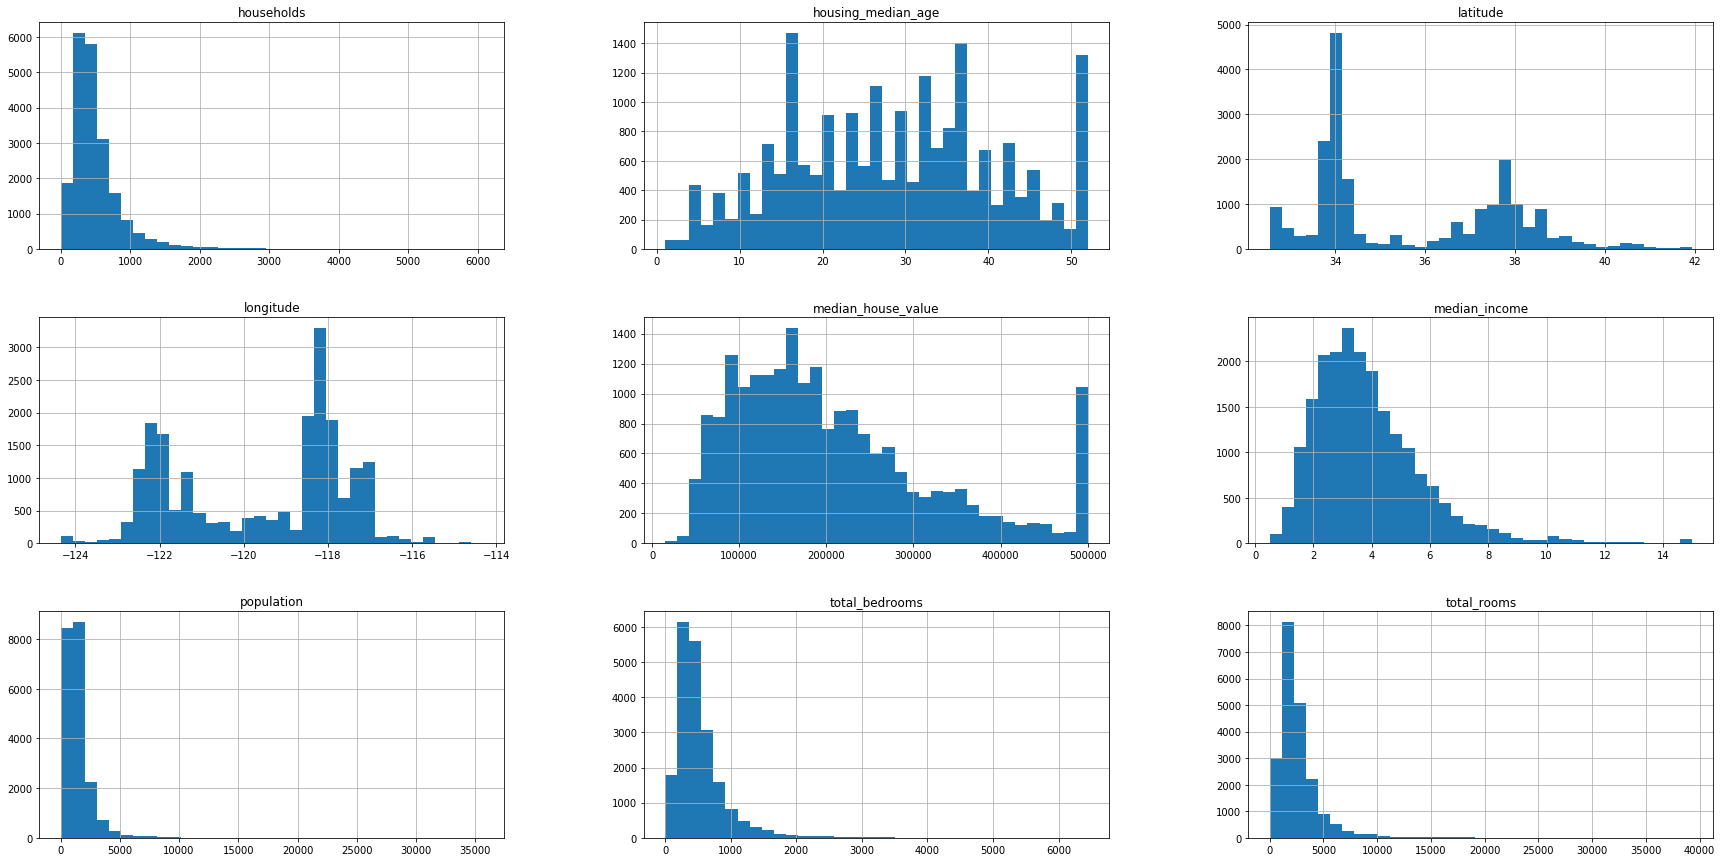

In [8]:
#draw simple histograms
import matplotlib.pyplot as plt
df.hist(bins=35, figsize=(30,15))
plt.show()

## Stratify the sample based on income
First let's check again the distribution of values, then we will create a new categorical income variable (rich, medium, poor). 

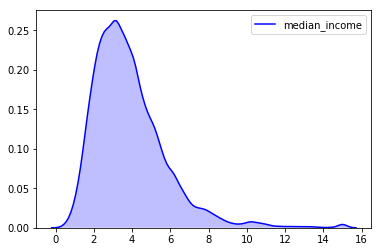

In [35]:
#simple histogram
#df['median_income'].hist(bins= 50)
#plt.show()
#kernel density estimates with seaborn
sns.kdeplot(df.median_income, shade=True, color="b")
plt.show()

medium    0.518508
rich      0.248692
poor      0.232800
Name: income_cat, dtype: float64

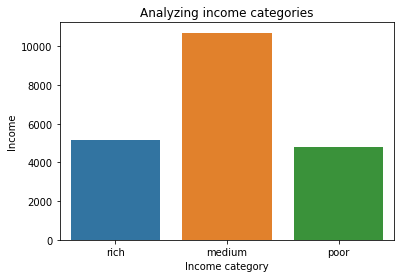

In [63]:
#create three income categories
def cat(x):
    if 0 < x <= 2.5:
        return 'poor'
    elif 2.5 < x <= 4.75:
        return 'medium'
    return 'rich'

df['income_cat'] = df['median_income'].apply(cat)
type(df['income_cat'])

#countplot to see if the categories are balanced
sns.countplot(x='income_cat', data=df)
plt.xlabel("Income category")
plt.ylabel("Income")
plt.title("Analyzing income categories")

df["income_cat"].value_counts() / len(df)

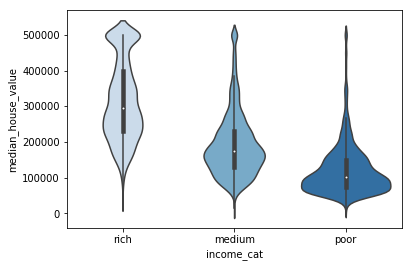

In [64]:
#now use the new variable for a violin plot, to visualize the relationship with house value
sns.violinplot(x=df['income_cat'], y=df['median_house_value'], palette="Blues")

### Compare the division of the dataset between random split and split stratifiedby income 

In [68]:
#split train-test set with scikitlearn (80-20). 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [73]:
from IPython.display import display

#overall
display(df["income_cat"].value_counts() / len(df))
#random split
display(test_set["income_cat"].value_counts() / len(df))
#stratified split
display(strat_test_set["income_cat"].value_counts() / len(df))

medium    0.518508
rich      0.248692
poor      0.232800
Name: income_cat, dtype: float64

medium    0.106105
poor      0.047141
rich      0.046754
Name: income_cat, dtype: float64

medium    0.103682
rich      0.049758
poor      0.046560
Name: income_cat, dtype: float64

In [74]:
# FROM NOW ON I will use a copy of the train set for data exploration
df = strat_train_set.copy()

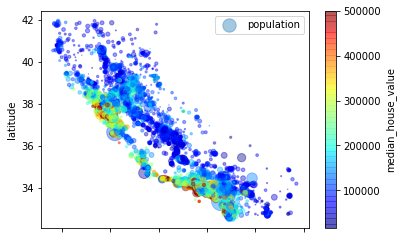

In [75]:
# this is a scatterplot of geographical data (California long/lat). The dots represent the properties, with urban areas like 
# San Francisco being more populated (bigger radius of the circles). The third variable is the value of the property (red meaning
#higher value, blue lower). In conclusion, the plot shows that houses near the Ocean/in an urban area are worth more 
#(location, location, location!)

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,) 
plt.legend()

## Now let's examine the correlations between variables

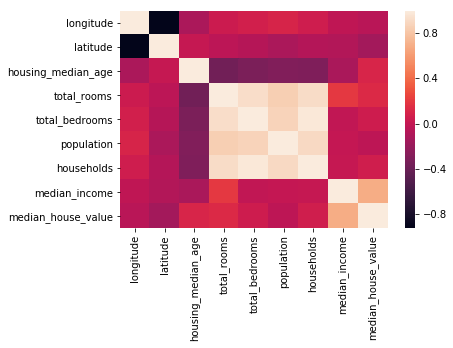

In [10]:
import seaborn as sns
#seabor is a wonderful library featuring a lot of interesting visualization, including violin plot
#if you don't use matplotlib inline, you will have to repeat plt.show every time...
%matplotlib inline
#Plotting a heatmap to visualize the correlation between the variables
sns.heatmap(df.corr())

## As to be expected, it seems there is a strong relationship between household income and the value of the house. Let's check it further with seaborne

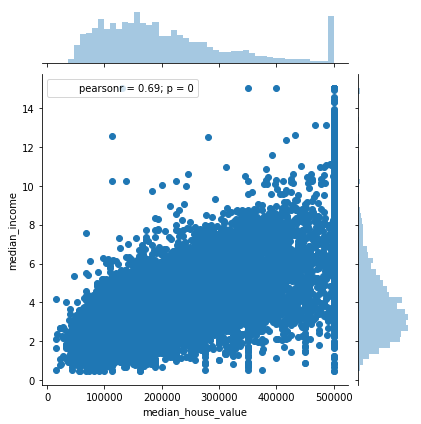

In [11]:
#joinplot to explore the relationship between housing median age and median income (negative strong corr)
sns.jointplot(x='median_house_value', y='median_income', data=df)

#the relationship is clear: the more you earn, the higher the value of your house. However, there is a stange pattern regarding 
#very expensive houses (over 50000), that seem associated even to households with low income. This may be due to the fact that
#the area gained value very fastly from one year to the other, so that even people with low incomes found themselves with 
#high-values properties? 


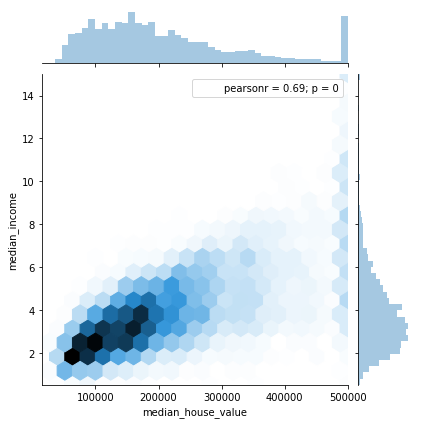

In [12]:
sns.jointplot(x='median_house_value', y='median_income', data=df, kind='hex', gridsize=20)

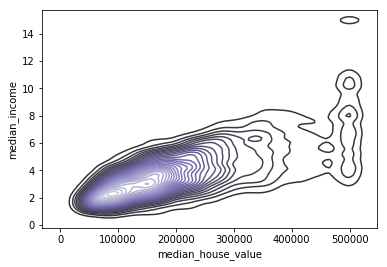

In [13]:
sns.kdeplot(df.median_house_value, df.median_income, n_levels=30, cmap="Purples_d", kind="kde")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925028,-0.109550,0.043317,0.066894,0.097783,0.050933,-0.017481,-0.048299
latitude,-0.925028,1.000000,0.012832,-0.034592,-0.064285,-0.107190,-0.067097,-0.075995,-0.140075
housing_median_age,-0.109550,0.012832,1.000000,-0.361036,-0.320943,-0.295496,-0.303371,-0.120077,0.104703
total_rooms,0.043317,-0.034592,-0.361036,1.000000,0.931551,0.855523,0.918038,0.194410,0.130552
total_bedrooms,0.066894,-0.064285,-0.320943,0.931551,1.000000,0.875532,0.978587,-0.009350,0.046621
population,0.097783,-0.107190,-0.295496,0.855523,0.875532,1.000000,0.906127,0.001822,-0.028824
households,0.050933,-0.067097,-0.303371,0.918038,0.978587,0.906127,1.000000,0.011256,0.062731
median_income,-0.017481,-0.075995,-0.120077,0.194410,-0.009350,0.001822,0.011256,1.000000,0.687292
median_house_value,-0.048299,-0.140075,0.104703,0.130552,0.046621,-0.028824,0.062731,0.687292,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268944DB240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000268969C4668>]], dtype=object)

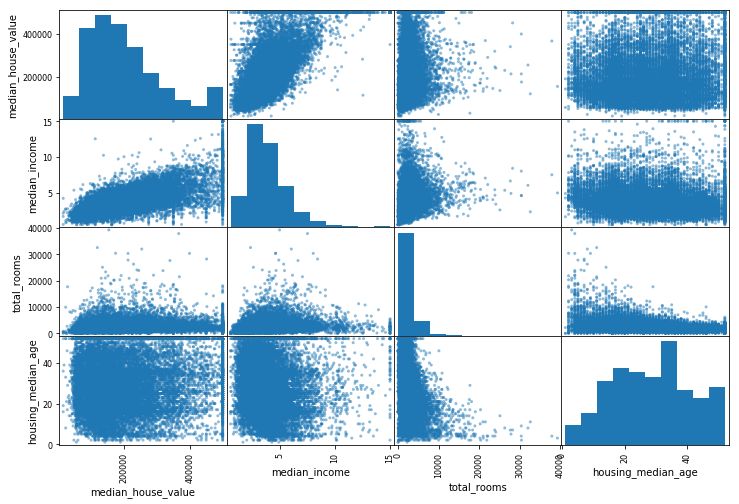

In [88]:
import pandas as pd
corr_matrix= df.corr(method='pearson')
display(corr_matrix)

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
corrm= scatter_matrix(df[attributes], figsize=(12, 8))
display(corrm)